In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load dataset
data = pd.read_csv(r"C:/Users/HP 840 G3/Downloads/spam.csv", encoding='latin-1')[['v1', 'v2']]
data.columns = ['label', 'text']

In [8]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # 0 = ham, 1 = spam

In [10]:
# Tokenization
max_words = 10000  # Vocabulary size
max_len = 100  # Max sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

In [14]:
# Build CNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\HP 840 G3\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8460 - loss: 0.4174 - val_accuracy: 0.9794 - val_loss: 0.0748
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9879 - loss: 0.0462 - val_accuracy: 0.9821 - val_loss: 0.0684
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9848 - val_loss: 0.0624
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9848 - val_loss: 0.0658
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 1.0000 - loss: 6.7140e-04 - val_accuracy: 0.9848 - val_loss: 0.0717


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9915 - loss: 0.0441
Test Accuracy: 0.9848


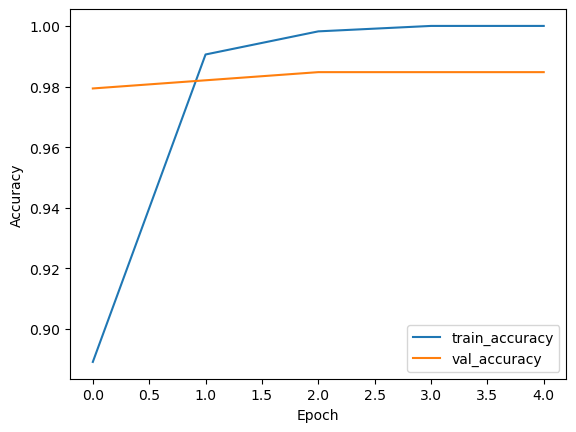

In [30]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Predict on new messages
def predict_spam(message):
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    return "Spam" if prediction > 0.5 else "Ham"

In [24]:
# Example messages
messages = ["Congratulations! You won a free vacation!", "Hey, are we still meeting today?"]
for msg in messages:
    print(f"Message: {msg} -> Prediction: {predict_spam(msg)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Message: Congratulations! You won a free vacation! -> Prediction: Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Message: Hey, are we still meeting today? -> Prediction: Ham
